# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [4]:
cities

['bethel',
 'thabazimbi',
 'talnakh',
 'fale old settlement',
 'olonkinbyen',
 'kimbe',
 'constantia',
 'port alfred',
 'la passe',
 'ulsteinvik',
 'edinburgh of the seven seas',
 'jayapura',
 'coquimbo',
 'fort st. john',
 'papatowai',
 'adamstown',
 'crane',
 'kudat',
 'nova sintra',
 'namanga',
 'castillos',
 'xilin hot',
 'toga village',
 'nema',
 'isafjordur',
 'mili',
 'taiohae',
 'jamestown',
 'arraial do cabo',
 'tindouf',
 'dudinka',
 'ribeira grande',
 'waitangi',
 'kapuskasing',
 'port mathurin',
 'laojunmiao',
 'garden city',
 'utrik',
 'geraldton',
 'bilibino',
 'avarua',
 'ust-nera',
 'gizo',
 'fuvahmulah',
 'zawiercie',
 'port-aux-francais',
 'ceeldheer',
 'peniche',
 'pano aqil',
 'hun',
 'la ronge',
 'darnah',
 'kangding',
 'blackmans bay',
 'nabire',
 'grytviken',
 'ciro marina',
 "tobol'sk",
 'udachny',
 'puerto natales',
 'cestos city',
 'ao luek',
 'vadso',
 'berdigestyakh',
 'kalmunai',
 'badger',
 'ilulissat',
 'vorgashor',
 'jiangzi',
 'antsiranana',
 'iqaluit',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?unit=Metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_request = requests.get(city_url)
        city_weather = city_request.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
       

    # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | thabazimbi
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | kimbe
Processing Record 7 of Set 1 | constantia
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | la passe
Processing Record 10 of Set 1 | ulsteinvik
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | jayapura
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | fort st. john
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | crane
Processing Record 18 of Set 1 | kudat
Processing Record 19 of Set 1 | nova sintra
Processing Record 20 of Set 1 | namanga
Processing Record 21 of Set 1 | castillos
Processing Record 22 of Set 1 | xilin hot
Proces

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,284.82,92,100,1.79,US,1741235816
1,thabazimbi,-24.5917,27.4116,295.35,71,0,1.13,ZA,1741235817
2,talnakh,69.4865,88.3972,261.83,95,100,3.73,RU,1741235818
3,fale old settlement,-9.3852,-171.2468,301.48,63,67,1.34,TK,1741235819
4,olonkinbyen,70.9221,-8.7187,270.00,66,42,8.62,SJ,1741235820


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,284.82,92,100,1.79,US,1741235816
1,thabazimbi,-24.5917,27.4116,295.35,71,0,1.13,ZA,1741235817
2,talnakh,69.4865,88.3972,261.83,95,100,3.73,RU,1741235818
3,fale old settlement,-9.3852,-171.2468,301.48,63,67,1.34,TK,1741235819
4,olonkinbyen,70.9221,-8.7187,270.00,66,42,8.62,SJ,1741235820


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

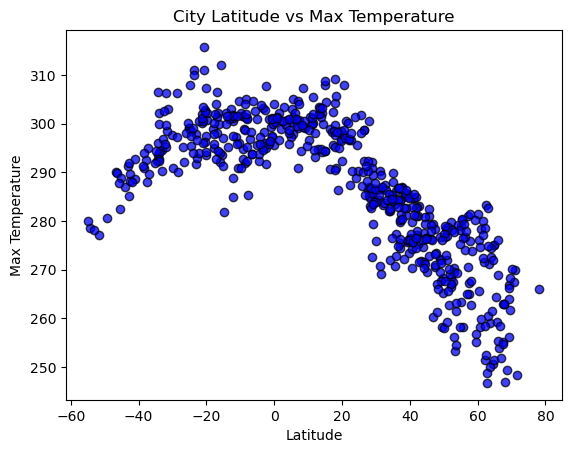

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

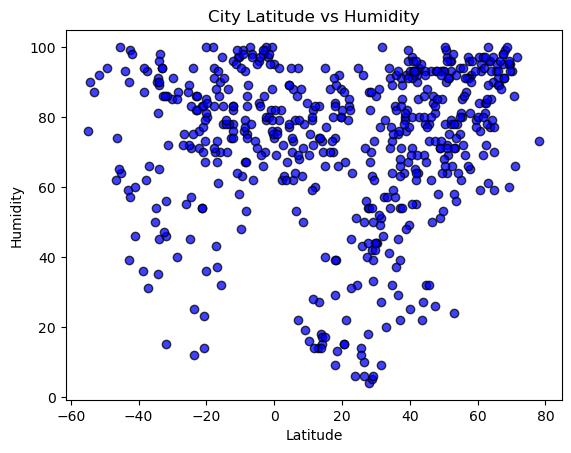

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

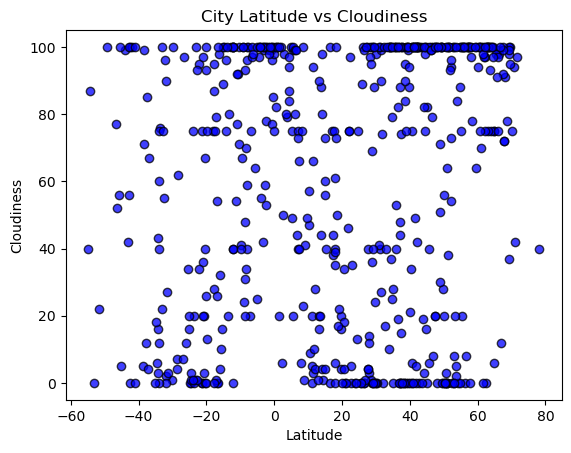

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

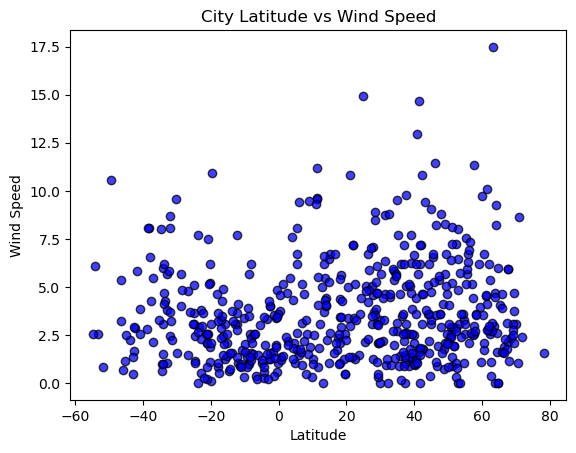

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,284.82,92,100,1.79,US,1741235816
2,talnakh,69.4865,88.3972,261.83,95,100,3.73,RU,1741235818
4,olonkinbyen,70.9221,-8.7187,270.00,66,42,8.62,SJ,1741235820
6,constantia,44.1833,28.6500,277.53,69,3,3.59,RO,1741235823
8,la passe,45.5549,-0.8967,281.10,78,6,6.53,FR,1741235825


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thabazimbi,-24.5917,27.4116,295.35,71,0,1.13,ZA,1741235817
3,fale old settlement,-9.3852,-171.2468,301.48,63,67,1.34,TK,1741235819
5,kimbe,-5.5502,150.1429,302.70,73,64,2.99,PG,1741235822
7,port alfred,-33.5906,26.8910,294.36,98,76,4.27,ZA,1741235824
10,edinburgh of the seven seas,-37.0676,-12.3116,289.67,66,67,5.46,SH,1741235827


###  Temperature vs. Latitude Linear Regression Plot

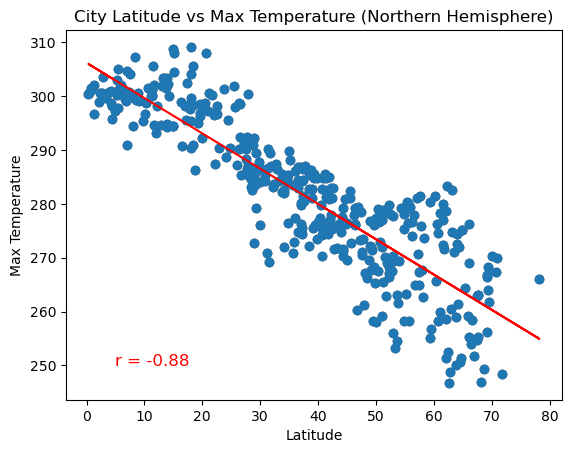

In [17]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("City Latitude vs Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.text(5, 250, f"r = {round(rvalue, 2)}", fontsize=12, color="red")
plt.savefig("output_data/Fig5.png")

plt.show()

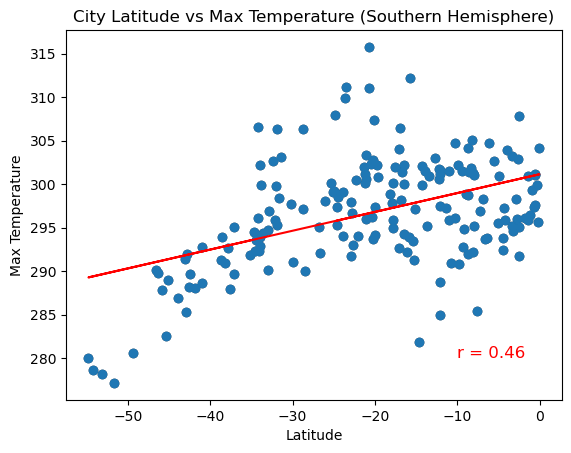

In [18]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("City Latitude vs Max Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.text(-10, 280, f"r = {round(rvalue, 2)}", fontsize=12, color="red")
plt.savefig("output_data/Fig6.png")

plt.show()

**Discussion about the linear relationship:** There is a strong negative coorelation between City Latitude and Max Temperature in the Northern Hemisphere and a strong positive coorelation bewteen City Latitude and Max Temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

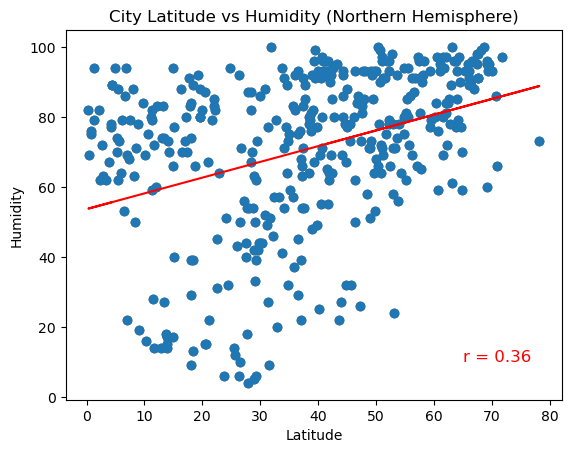

In [19]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("City Latitude vs Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(65, 10, f"r = {round(rvalue, 2)}", fontsize=12, color="red")
plt.savefig("output_data/Fig7.png")

plt.show()

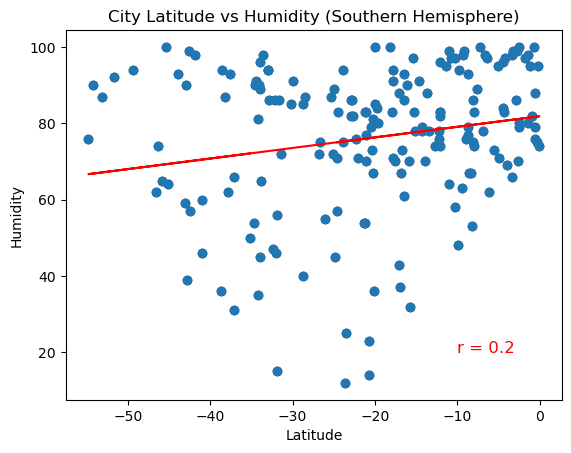

In [20]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("City Latitude vs Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-10, 20, f"r = {round(rvalue, 2)}", fontsize=12, color="red")
plt.savefig("output_data/Fig8.png")

plt.show()

**Discussion about the linear relationship:** There is a moderate positive coorlation between City Latitude and Humidity in the Northern Hemisphere and a weak negative coorelation between City Latitude and Humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

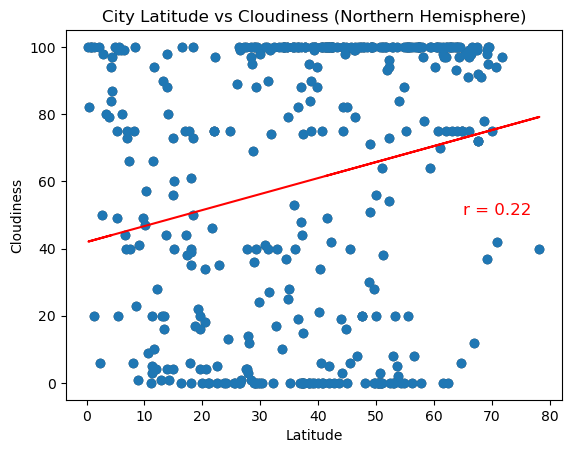

In [21]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("City Latitude vs Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(65, 50, f"r = {round(rvalue, 2)}", fontsize=12, color="red")
plt.savefig("output_data/Fig9.png")

plt.show()

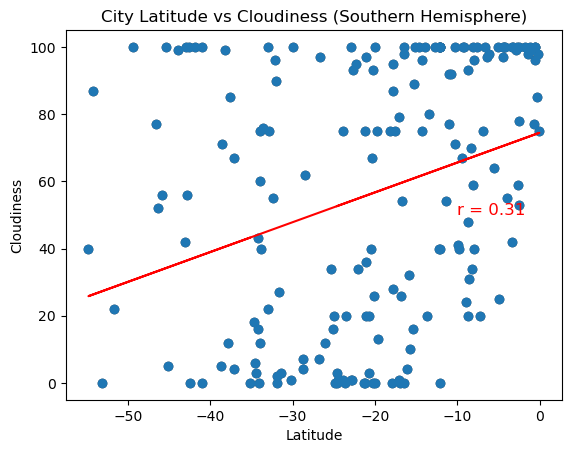

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("City Latitude vs Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(-10, 50, f"r = {round(rvalue, 2)}", fontsize=12, color="red")
plt.savefig("output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship:** There is a weak positive coorelation between City Latitude and Cloudiness in both the Southern and Northern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

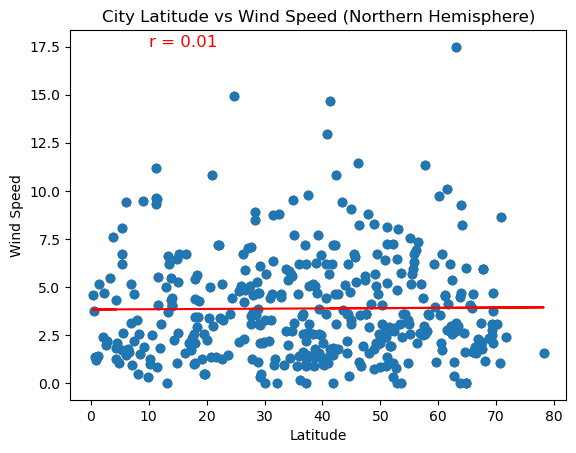

In [23]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.title("City Latitude vs Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(10, 17.5, f"r = {round(rvalue, 2)}", fontsize=12, color="red")
plt.savefig("output_data/Fig11.png")

plt.show()

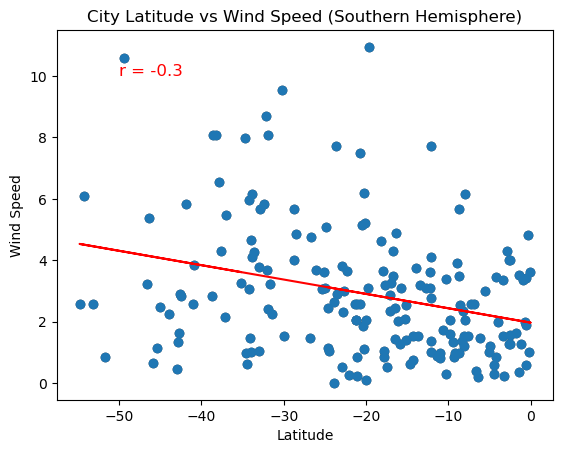

In [24]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.title("City Latitude vs Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(-50, 10, f"r = {round(rvalue, 2)}", fontsize=12, color="red")
plt.savefig("output_data/Fig12.png")

plt.show()

**Discussion about the linear relationship:** There is a weak negative coorelation between City Latitude and Wind Speed in both the Northen and Southern Hemispheres.